In [14]:
%load_ext autoreload
%autoreload 2
from astropy import units as u
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve, root


from cluster import Cluster, func
from load_galweight_data import load_clusters


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
clusters, variances = load_clusters(nrows=5)

In [4]:
test_cluster = clusters[1]

In [16]:
log_m_chi = -4
log_sigma_0 = -20
predicted_temperatures = [test_cluster.pred_T_b([s_0, log_m_chi]) for s_0 in log_sigma_0]
#plt.plot(log_sigma_0, self.virial_temperature(self.m_chi, f_chi=f_chi, m_psi=m_psi),
#                   label=f'T_b = pred_T_b, fx={f_chi}')
#plt.xlabel(r'$m_{\chi} (GeV)$')
#plt.ylabel(r'$T_{\chi} (GeV)$')

TypeError: 'int' object is not iterable

In [17]:
predicted_temperatures

NameError: name 'predicted_temperatures' is not defined

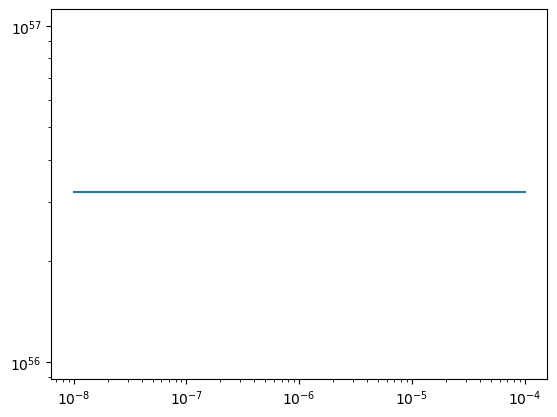

In [22]:
Tbs = np.logspace(-4, -8)
plt.loglog(Tbs, func(Tbs,[log_sigma_0, log_m_chi], test_cluster ))

Text(0, 0.5, 'Temperature (GeV)')

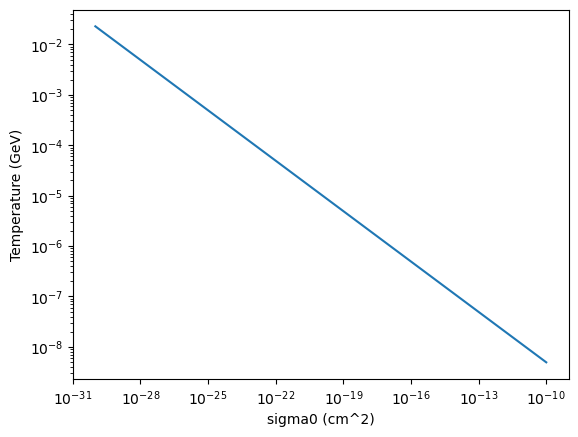

In [19]:
sigma0s = np.linspace(-30,-10)
T_bs = [test_cluster.pred_T_b_small_m(np.power(10,s0)*u.cm**2, 1e-6*u.GeV).value for s0 in sigma0s]
plt.loglog(np.power(10,sigma0s), T_bs)

plt.xlabel('sigma0 (cm^2)')
plt.ylabel('Temperature (GeV)')

In [21]:
x0 = 1e-6 * u.GeV
p0=[-20, -6]
root(func, x0, (p0,test_cluster))

 message: The iteration is not making good progress, as measured by the 
            improvement from the last ten iterations.
 success: False
  status: 5
     fun: [ 1.173e+56]
       x: [ 1.000e-06]
    nfev: 13
    fjac: [[ 1.000e+00]]
       r: [       nan]
     qtf: [ 1.173e+56]

In [11]:
from sympy import Symbol, nsolve


In [13]:
x0=1e-6
T_b = Symbol('T_b')
f = func(T_b, p0, test_cluster)
nsolve(f, [p0, test_cluster], x0)

TypeError: unsupported operand type(s) for *: 'Symbol' and 'PrefixUnit'

In [ ]:
def f(T_b, p0, test_cluster):
    #function used to solve for T_b
    sigma0 = p0[0]*u.cm**2
    m_chi=p0[1]*u.GeV
    T_b = T_b*u.GeV
    
    V=cluster.volume.to(u.cm**3)
    x = (3*const.c*c(n)*V*cluster.rho_dm*cluster.rho_b*sigma0/(cluster.m_b+m_chi)**2).to(1/u.s)
    gm2 = ((const.G * cluster.bh_mass()) ** 2).to(u.cm**6/u.s**4)
    frac = ((cluster.mu * cluster.m_b) ** (5 / 2) / cluster.adiabatic_idx ** (3 / 2)).to(u.GeV**(5/2))
    nb = (2 * cluster.n_e).to(u.cm ** (-3)) # baryon number density
    D = (cluster.epsilon*cluster.leading_factors*gm2*frac*(1/nb**(2/3))**(-3/2)) # removed k_B from original function because we are working in GeV here
    T_chi = cluster.virial_temperature(m_chi)
    
    numerator = D*T_b**(-3/2)
    denominator = (T_b - T_chi)*(T_chi/m_chi + T_b/cluster.m_b)**(1/2)
    
    return ((numerator/denominator - x)*const.hbar).to(u.GeV, equivalencies=u.temperature_energy())